# 图像特效-漏光滤镜（Lightleaks Filter）

In [1]:
from scipy import signal
import numpy as np
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [2]:
src = cv2.imread('../datas/sunset2.jpg')
gray = cv2.imread('../datas/sunset2.jpg',0)
rgb = cv2.cvtColor(src,cv2.COLOR_BGR2RGB)

In [11]:
def lightleaks_filter(img,mixPixel):
    basePixel = np.float32(img)
    res = np.zeros_like(basePixel)
   
    if mixPixel[0] <= 128:
        res[:,:,0] =  (mixPixel[0] * basePixel[:,:,0] / 128)
    else:
        res[:,:,0] =  (255 - (255 - mixPixel[0]) * (255 - basePixel[:,:,0]) / 128)
    if mixPixel[1] <= 128: 
        res[:,:,1] = (mixPixel[1] * basePixel[:,:,1] / 128)
    else:
        res[:,:,1] = (255 - (255 - mixPixel[1]) * (255 - basePixel[:,:,1]) / 128)
    
    if mixPixel[2] <= 128: 
        res[:,:,2] = mixPixel[2] * basePixel[:,:,2] / 128
    else:
        res[:,:,2] = (255 - (255 - mixPixel[2]) * (255 - basePixel[:,:,2]) / 128)
    res = np.clip(res,0,255)
    return np.uint8(res)

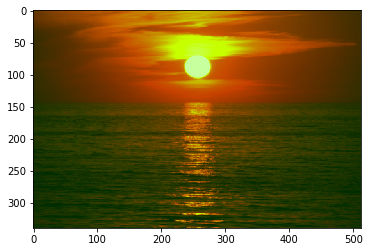

In [15]:
dst = lightleaks_filter(rgb,(100,150,80))
plt.imshow(dst)